In [2]:
import pandas as pd

# Charger le dataset
data = pd.read_csv("pima-indians-diabetes.csv")

# Exploration
print(data.info())
print(data.describe())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
                6         148          72          35           0        33.6  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.00000

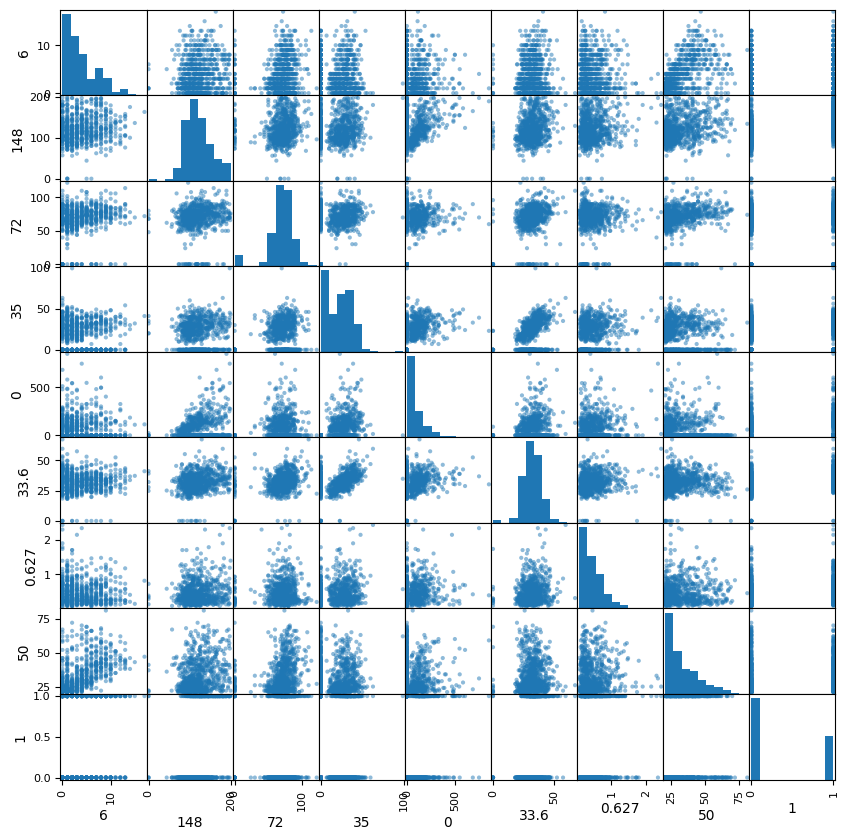

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(10, 10))
plt.show()


In [5]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

# Univariate Selection
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
select_k_best = SelectKBest(score_func=f_classif, k=5).fit(X, y)
print(select_k_best.scores_)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

# RFE
model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Résultat de la sélection
print("Features selected:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

# Feature Importance
model.fit(X, y)
print(model.feature_importances_)


[ 39.31428116 212.03864104   3.23399258   4.12849461  13.56233147
  71.67881257  23.67113786  45.28969585]
[0.88863537 0.06151977]
Features selected: [False  True  True False False  True  True  True]
Feature ranking: [2 1 1 4 3 1 1 1]
[0.05493391 0.34193591 0.09805981 0.0159273  0.03339947 0.22311173
 0.12844356 0.10418831]


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM Linear": SVC(kernel="linear", probability=True),
    "SVM Polynomial": SVC(kernel="poly", probability=True),
    "SVM Gaussian": SVC(kernel="rbf", probability=True),
    "ANN": MLPClassifier(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully!")


KNN trained successfully!
Decision Tree trained successfully!
Naive Bayes trained successfully!
SVM Linear trained successfully!
SVM Polynomial trained successfully!
SVM Gaussian trained successfully!
ANN trained successfully!


In [8]:
import joblib

for name, model in models.items():
    joblib.dump(model, f"{name}.joblib")

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss, accuracy_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    print(f"Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Log Loss:", log_loss(y_test, y_proba))
    print("ROC AUC:", roc_auc_score(y_test, y_proba[:, 1]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Results for KNN:
Accuracy: 0.7337662337662337
Log Loss: 1.1650941328245505
ROC AUC: 0.7895641164767588
Confusion Matrix:
 [[80 17]
 [24 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80        97
           1       0.66      0.58      0.62        57

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154

Results for Decision Tree:
Accuracy: 0.6948051948051948
Log Loss: 11.000335774600691
ROC AUC: 0.6890034364261168
Confusion Matrix:
 [[69 28]
 [19 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.75        97
           1       0.58      0.67      0.62        57

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.69      0.70       154

Result

KNN: Mean Accuracy = 0.743, Std Dev = 0.013
Decision Tree: Mean Accuracy = 0.698, Std Dev = 0.039
Naive Bayes: Mean Accuracy = 0.752, Std Dev = 0.041
SVM Linear: Mean Accuracy = 0.776, Std Dev = 0.022
SVM Polynomial: Mean Accuracy = 0.777, Std Dev = 0.009
SVM Gaussian: Mean Accuracy = 0.773, Std Dev = 0.023
ANN: Mean Accuracy = 0.767, Std Dev = 0.029
            Model  Mean Accuracy   Std Dev
0             KNN       0.743188  0.012729
1   Decision Tree       0.697555  0.039303
2     Naive Bayes       0.752381  0.041248
3      SVM Linear       0.775809  0.021814
4  SVM Polynomial       0.777056  0.008564
5    SVM Gaussian       0.773186  0.022685
6             ANN       0.766675  0.029464


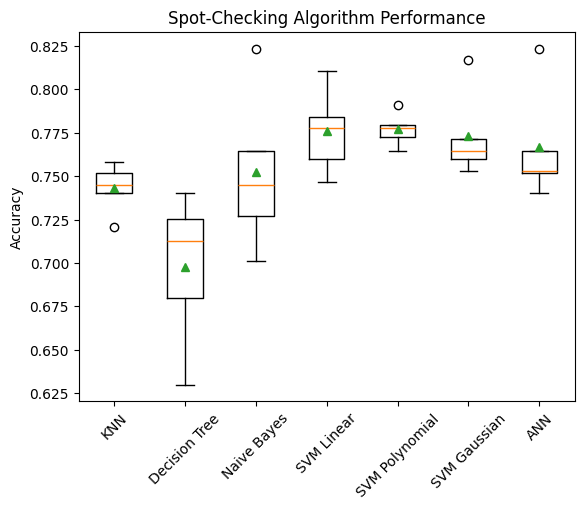

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Liste des modèles à comparer
models = [
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("SVM Linear", SVC(kernel="linear")),
    ("SVM Polynomial", SVC(kernel="poly")),
    ("SVM Gaussian", SVC(kernel="rbf")),
    ("ANN", MLPClassifier(max_iter=1000))
]

# Validation croisée
results = []
names = []
scoring = "accuracy"

X = X_normalized  # Assurez-vous que vos données sont normalisées
y = data.iloc[:, -1]  # Dernière colonne comme cible

# Stratified K-Fold pour préserver les proportions des classes
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Tester chaque modèle
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean Accuracy = {cv_results.mean():.3f}, Std Dev = {cv_results.std():.3f}")

# Résumé des performances
results_df = pd.DataFrame({
    "Model": names,
    "Mean Accuracy": [np.mean(res) for res in results],
    "Std Dev": [np.std(res) for res in results]
})

print(results_df)

# Optionnel : Visualisation des résultats
import matplotlib.pyplot as plt

plt.boxplot(results, tick_labels=names, showmeans=True)
plt.title("Spot-Checking Algorithm Performance")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


In [17]:
import os
model_filenames = [
    "KNN.joblib",
    "Decision Tree.joblib",
    "Naive Bayes.joblib",
    "SVM Linear.joblib",
    "SVM Polynomial.joblib",
    "SVM Gaussian.joblib",
    "ANN.joblib"
]

# Dictionnaire pour stocker les prédictions
model_predictions = {}

# Charger chaque modèle et prédire
for filename in model_filenames:
    model_name = filename.replace(".joblib", "")
    if os.path.exists(filename):  # Vérifie si le fichier existe
        # Charger le modèle
        loaded_model = joblib.load(filename)
        # Faire les prédictions
        predictions = loaded_model.predict(X_test)
        # Sauvegarder les prédictions dans le dictionnaire
        model_predictions[model_name] = predictions
        print(f"Predictions for {model_name}:")
        print(predictions)
    else:
        print(f"Model file {filename} not found!")

Predictions for KNN:
[0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1
 0 1 0 0 0 0]
Predictions for Decision Tree:
[0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1
 1 1 0 1 0 0]
Predictions for Naive Bayes:
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1
 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1

In [24]:
from sklearn.ensemble import BaggingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = [
    KNeighborsClassifier(),         
    DecisionTreeClassifier()      
]

# Bagging
bagging = BaggingClassifier(estimator=models[1], n_estimators=10).fit(X_train, y_train)

# Stacking
stacking = StackingClassifier(
    estimators=[("KNN", models[0]), ("Decision Tree", models[1])]
).fit(X_train, y_train)

# Boosting
boosting = GradientBoostingClassifier().fit(X_train, y_train)

# Évaluation
print("Bagging Accuracy:", accuracy_score(y_test, bagging.predict(X_test)))
print("Stacking Accuracy:", accuracy_score(y_test, stacking.predict(X_test)))
print("Boosting Accuracy:", accuracy_score(y_test, boosting.predict(X_test)))

Bagging Accuracy: 0.7272727272727273
Stacking Accuracy: 0.7337662337662337
Boosting Accuracy: 0.7792207792207793


In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, classification_report

# Initialisez un dictionnaire pour enregistrer les résultats
results = {}

# Liste des modèles avec leurs noms
model_names = ["Bagging", "Stacking", "Boosting"]
models = [bagging, stacking, boosting]

# Calcul des métriques pour chaque modèle
for name, model in zip(model_names, models):
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, predictions),
        "ROC AUC": roc_auc_score(y_test, probabilities[:, 1]) if probabilities is not None else None,
        "Log Loss": log_loss(y_test, probabilities) if probabilities is not None else None,
        "Classification Report": classification_report(y_test, predictions, output_dict=True)
    }

# Affichage des résultats
for model_name, metrics in results.items():
    print(f"Performance for {model_name}:")
    for metric, value in metrics.items():
        if metric != "Classification Report":
            print(f"  {metric}: {value}")
    print(f"  Classification Report: {metrics['Classification Report']}\n")


Performance for Bagging:
  Accuracy: 0.7272727272727273
  ROC AUC: 0.8026767950804847
  Log Loss: 1.591704938310441
  Classification Report: {'0': {'precision': 0.7669902912621359, 'recall': 0.8144329896907216, 'f1-score': 0.79, 'support': 97.0}, '1': {'precision': 0.6470588235294118, 'recall': 0.5789473684210527, 'f1-score': 0.6111111111111112, 'support': 57.0}, 'accuracy': 0.7272727272727273, 'macro avg': {'precision': 0.7070245573957739, 'recall': 0.6966901790558871, 'f1-score': 0.7005555555555556, 'support': 154.0}, 'weighted avg': {'precision': 0.7226000726857379, 'recall': 0.7272727272727273, 'f1-score': 0.7237878787878789, 'support': 154.0}}

Performance for Stacking:
  Accuracy: 0.7337662337662337
  ROC AUC: 0.7888406583468981
  Log Loss: 0.540419009634573
  Classification Report: {'0': {'precision': 0.7745098039215687, 'recall': 0.8144329896907216, 'f1-score': 0.7939698492462312, 'support': 97.0}, '1': {'precision': 0.6538461538461539, 'recall': 0.5964912280701754, 'f1-score':

          Accuracy   ROC AUC  Log Loss  \
Bagging   0.727273  0.802677  1.591705   
Stacking  0.733766  0.788841  0.540419   
Boosting  0.779221  0.855489  0.465099   

                                      Classification Report  
Bagging   {'0': {'precision': 0.7669902912621359, 'recal...  
Stacking  {'0': {'precision': 0.7745098039215687, 'recal...  
Boosting  {'0': {'precision': 0.8181818181818182, 'recal...  


<Axes: title={'center': 'Model Comparison'}>

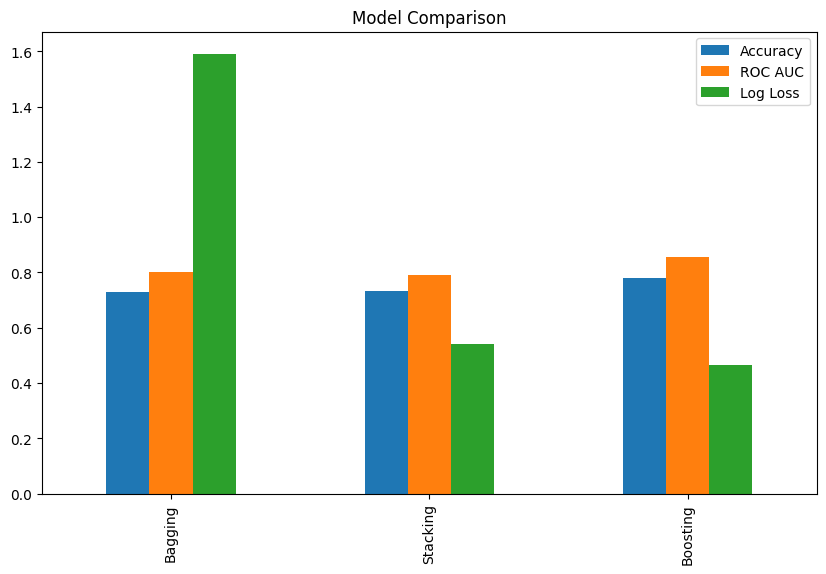

In [27]:
# Convertir les résultats en DataFrame pour faciliter la comparaison
df_results = pd.DataFrame.from_dict(results, orient='index')

# Affichage des résultats sous forme de tableau
print(df_results)

# Analyse graphique pour mieux visualiser
df_results[["Accuracy", "ROC AUC", "Log Loss"]].plot(kind="bar", figsize=(10, 6), title="Model Comparison")
